# <center>Predicting Motor Vehicle Accident Severity in Seattle, Washington</center>

## <center>Christopher Bates</center>
### <center>15 December 2020</center>

## I. Introduction

### Background
Personal transportation plays a critical role in the lives of nearly every resident of the United States. 
With the continued growth of suburbs and increasing commuting times, it is essential for commuters to have safe, reliable modes of transportation.
Ride-sharing services like Uber, as well as fleets of bicycles and electric scooters for rent, have certainly provided more travel options.
But these "greener" modes of transportation are not without risk.
In 2017, according to the Centers for Disease Control and Prevention, motor vehicle accidents alone accounted for 40,231 fatalites, 
not to mention many times this number of severe injuries.
Could the increased use of bicycles, scooters, and ride-sharing services actually increase the frequency of serious or fatal accidents
between motor vehicles and the more vulnerable pedestrians or cyclists?
Commuters certainly deserve to know the risks involved in their daily transit behaviors.
Machine learning technologies can quantify these risks, allowing commuters to make informed decisions based on travel conditions and traffic data.

### Problem
The goal of this project is to predict the severity of a given motor vehicle accident in Seattle, Washington, given certain data related to the accident.
Our models will classify each accident into exactly one of two categories:
<ol>
    <li>Minor Accidents</li>
    <ul>
        <li>property damage, but no injuries and no fatalities;</li>
        <li>at least one injury, but no serious injuries and no fatalites;</li>
    </ul>
    <li>Major Accidents</li>
    <ul>
        <li>at least one serious injury, but no fatalites;</li>
       <li>at least one fatality.</li>
    </ul>
 </ol>
Each model will receive data regarding a set of moter vehicle accidents.
For each incident, the model will take into account the weather, road, and lighting conditions at the time and location of the motor vehicle accident.
Input to the model will also include the number of people involved in the accident and the nature of their involvement,
the number and types of vehicles and the nature of their involvement.

### Interest
When an accident is initially reported to first responders, it can be helpful to have an accurate prediction of the severity of the accident.
Such  an "accident severity forecast" could allowing emergency rooms and hospital staff to allocate their resources more efficiently.
Furthermore, these accident severity forecasts can enable city planners, engineers, and architects to design traffic safer transit systems
and roadways by identifying locations with a higher frequencies of accidents with serious injuries or fatalites.

With the advent of autonomous vehicles, it is possible for accident severity models to aid in the selection safer routes based on weather and traffic conditions. 
In the event an autonomous vehicles is involved in an accident, the onboad system could communicate data to first responders and local hospitals,
allowing them to formulate an efficient, effective response driven by accident severity models.

## II. Data

### Data Sources
All of the data used in the training, testing, and validation of our machine learning models was obtained from the 
[City of Seattle's Open Data Portal](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions) free of charge. 
Accorinding to the website, the data set includes all types of collisions in a timeframe starting in 2004 through the present.
Because the data set available on this website may change over time,
we downloaded the collisions data set once and performed all training, testing, and validation with the same locally stored data set.

### Data Cleaning
We went through several iterations of cleaning the data and looking for trends. 
The original data set was in the form of a .csv file, which we imported as a data frame. 
Initially, before any data cleaning, the data frame consisted of 221143 rows and 40 columns.
There were 5 columns of floating point type, 12 columns of integer type, and 23 columns of object type.
Using the [Attributes Information Form](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) located on the same website as the collisions .csv file,
we removed any columns corresponding to unique identification keys or codes that would offer no benefit in the context of machine learning.
We also removed any columns deemed redundant in light of combinations of other columns that could yield the same information.
Using the Attribute Information Form, we also identified any "sentinal" values, which actually indiate that a value is "unknown," and converted those values to NaN.
We then dropped any column with more than 15% NaN because there was no reasonable way to assign a value to such fields.
Finally, we dropped any row that contained at least in NaN.

### Feature Selection
In selecting the features for training and testing the models, we went through several iterations to determine the most important features for this problem.
Since the goal is to predict accident severity, it seemed reasonable to include features that can be forecast before an accident takes place, such as weather, road, and light conditions.
The road conditions may be highly dependent on, and thus correlated with, the weather.
Light conditions, on the other hand, depend on the time of day, weather conditions, as well as physical infrastructure like street lights.

The number of pedestrians and cyclists involved in an accident also appears to be information information to incorporate into our models.
In the real world, this information could be gathered at the scene of an accident immediately after the accident has occured.
While the original data set contains information representing the longitude, latitude, and date-time of the accidents,
these types of data require more processing and feature engineering to convert them into a form that is useful for machine learning applications.
In our first attempt at predicting accident severity, we will take a simpler approach and reserve the spatial and temporal data for future investigation.
Ultimately, our models rely on just six features:
<ul>
    <li>type of collision</li>
    <li>number of pedestrians involved</li>
    <li>number of cyclists involved</li>
    <li>weather conditions</li>
    <li>road conditions</li>
    <li>light conditions</li>
</ul>

The possible values for each of these features are detailed in [Attributes Information Form](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) 
mentioned previously.

## III. Methodology

The problem of predicting the severity of motor vehicle accidents boils down to this: 
given the features of the accident, can we build a model that can classify the accident severity as either major or minor.
Because our data set consists of only labeled data, we will use supervised learning methods to train and test various binary classifiers.
There are numerous algorithms available for this classification problem.
In this paper we select four models to predict accident severity: logistic regression, support vector machine, $k$-nearest neighbors, and decision tree.
We selected these models because they represent some of the simplest supervised learning models for classification problems.
These models have few hyperparameters to optimize, 
and the performance of each model will provide a baseline to facilitate comparisons to other more advanced models in future investigations.
In the Results section of this paper, we discuss the benefits and caveats of each model, and we compare their performance on the same test data.

### Target Variable - Values and Distribution
The target variable to be predicted by the our models is the severity of a given motor vehicle accident.
In the original data set, the severity of each accident is represented by the "SEVERITYCODE" column, taking one of the following values:
<ul>
    <li><b>1</b> - property damage, but no injuries and no fatalities;</li>
    <li><b>2</b> - at least one injury, but no serious injuries and no fatalites;</li>
    <li><b>2b</b> - at least one serious injury, but no fatalites;</li>
    <li><b>3</b> -  at least one fatality.</li>
</ul>
To sharpen the diference between the features of the accidents in the data set, we created a binary classification scheme.
SEVERITYCODE values 1 and 2 are consolidated into a single class, colloquially refered to as "minor severity";
SEVERITYCODE values 2b and 3 are consolidated into a single class, colloquially refered to as "major severity."
Based on this consolidation scheme, we created a new boolean variable IS_SEVERE;
it has the value True in case an accident has major severity, and False if an accident has minor severity.

After cleaning the data, and prior to splitting it into training and testing sets, the motor vehicle accdients had the following distribution of labels according to our new binary classification scheme:

In [134]:
pd.DataFrame(df_categorical['IS_SEVERE'].value_counts(normalize=True, dropna=False))

,IS_SEVERE
False,0.981946146
True,0.018053854


Initially, we split the data into two, disjoint, imbalanced sets:
<ul>
    <li>a set we will use to generating a balanced training set;</li>
    <li>an imbalanced set to be used for testing..</li>
</ul>
The values of column IS_SEVERE are boolean and imbalanced, skewing greatly in favor of False (minor accidents).
In order to generate a balanced training set, we use the techniques of oversampling with replacement from the minority class (accidents with True in column IS_SEVERE),
along with undersampling without replacement fromthe majority class (accidents with False in column IS_SEVERE).
Oversampling with replacement occured when the number of samples taken exceeded the number accidents available for sampling;
conversely, undersampling without replacement occured if the number of samples taken was less than the number of accidents available for sampling.
We reiterate that the test set contained no data that was used for training, and and vice versa.

### Relationship between Severity and Collision Type
One feature that seemed to have great influence over the severity of the accident is the type of the collision, represented by column COLLISIONTYPE.
Certainly, collisions involving a motor vehicle and either pedestrians or cyclists, have a tendency to result in worse outcomes;
Those victims who are outside a vehicle's protective crash-cage are more vulnerable to serious injury or death compared to occupants of a vechicle.
We compared the distibution of accident severity for each type of collision agains the overall distribution of accident severity in order to identify the most hazardous types of collisions.
As predicted, the most dangerous collisions are those involving pedestrians, followed by accidents with cyclists.

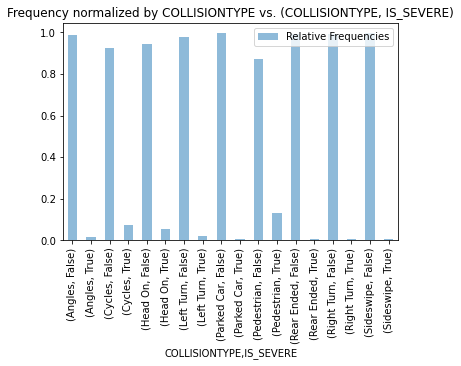

In [135]:
ax = df_frequencies_by_collisiontype.plot.bar(alpha=.5, title='Frequency normalized by COLLISIONTYPE vs. (COLLISIONTYPE, IS_SEVERE)')

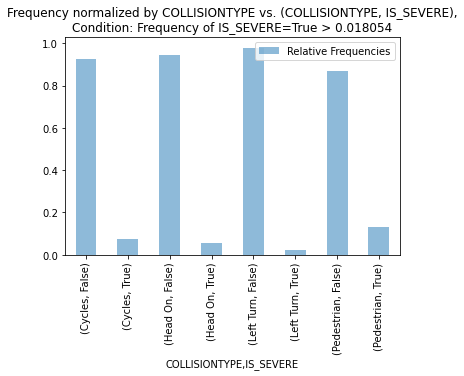

In [136]:
ax = df_frequencies_by_collisiontype[
    df_frequencies_by_collisiontype.xs(True, level=1, axis=0) > severity_frequency_cutoff]\
    .dropna().plot.bar(alpha=.5,\
    title='Frequency normalized by COLLISIONTYPE vs. (COLLISIONTYPE, IS_SEVERE),\nCondition: Frequency of IS_SEVERE=True > %f' %\
    (severity_frequency_cutoff))

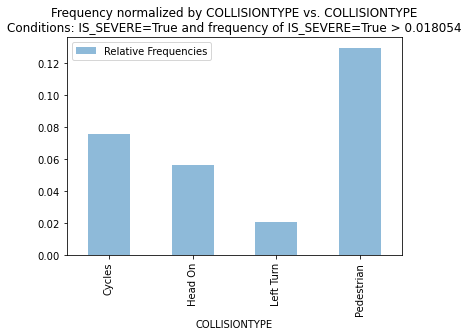

In [137]:
ax = df_frequencies_by_collisiontype[\
    df_frequencies_by_collisiontype.xs(True, level=1, axis=0) > severity_frequency_cutoff]\
    .dropna().xs(True, level=1, axis=0).plot.bar(alpha=.5,\
    title='Frequency normalized by COLLISIONTYPE vs. COLLISIONTYPE\nConditions: IS_SEVERE=True and frequency of IS_SEVERE=True > %f' %\
    (severity_frequency_cutoff))

### Relationship between Severity and Weather Conditions
While it is natural to assume the weather has an influence on the likelihood and severity of accidents, it is important to quantify this relationship.
Inclement weather certainly can contribute to poor road conditions and decreased visibility.
On the other hand, clement weather may increase the numbers of cyclists and pedestrians on roadways and at intersections.
Thus, weather may also indirectly effect accident severity by directly influencing the numbers for pedestrians and cyclists outside wihen the weather is nice.

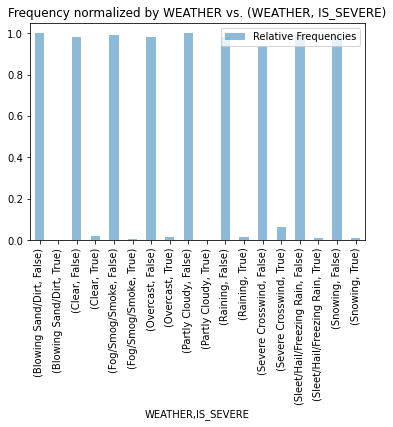

In [138]:
ax = df_frequencies_by_weather.plot.bar(alpha=.5, title='Frequency normalized by WEATHER vs. (WEATHER, IS_SEVERE)')

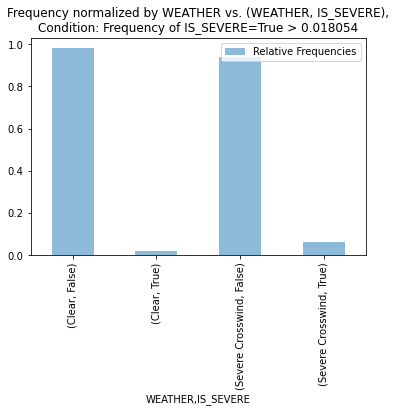

In [139]:
ax = df_frequencies_by_weather[df_frequencies_by_weather.xs(True, level=1, axis=0) > severity_frequency_cutoff].dropna().plot.bar(alpha=.5,\
    title='Frequency normalized by WEATHER vs. (WEATHER, IS_SEVERE),\nCondition: Frequency of IS_SEVERE=True > %f' %
    (severity_frequency_cutoff))

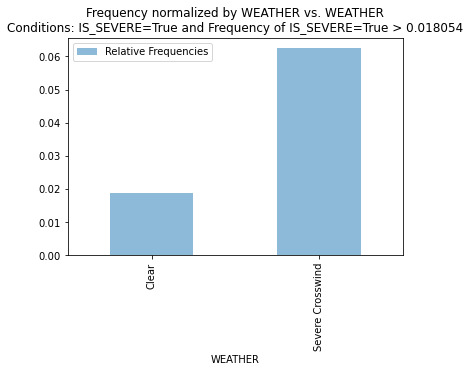

In [140]:
ax = df_frequencies_by_weather[\
    df_frequencies_by_weather.xs(True, level=1, axis=0) > severity_frequency_cutoff]\
    .dropna().xs(True, level=1, axis=0).plot.bar(alpha=.5,\
    title='Frequency normalized by WEATHER vs. WEATHER\nConditions: IS_SEVERE=True and Frequency of IS_SEVERE=True > %f' %\
    (severity_frequency_cutoff))

### Relationship between Severity and Road Conditions
While weather may certainly have a direct influence on the road conditions, 
there may also be location-dependent factors such as the efficacy of sewers and preponderence of standing water.
It is important to include road conditions as an additional, and highly location-specific, measure of the level of hazard when an accident occurs.
It is noteworthy that out of the 51 accidents with standing water as the road conditions, exactly one of these resulted in an accident of major severity.
Besides standing water, the only other road condition resulting in an increased likelihood of a severe accident is dry road conditions.
This seeemingly paradoxical observation provides further support for the hypothesis that clement weather causes more severe accidents by increasing the rates of pedestrian-involved and cyclist-involved collisions.

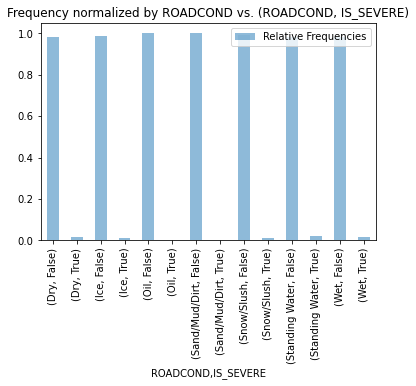

In [141]:
ax = df_frequencies_by_roadcond.plot.bar(alpha=.5, title='Frequency normalized by ROADCOND vs. (ROADCOND, IS_SEVERE)')

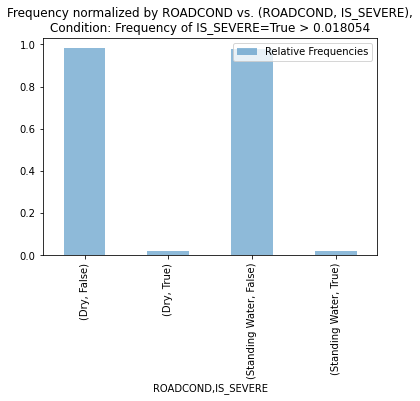

In [142]:
ax = df_frequencies_by_roadcond[df_frequencies_by_roadcond.xs(True, level=1, axis=0) > severity_frequency_cutoff].dropna().plot.bar(alpha=.5,\
    title='Frequency normalized by ROADCOND vs. (ROADCOND, IS_SEVERE),\nCondition: Frequency of IS_SEVERE=True > %f' %
    (severity_frequency_cutoff))

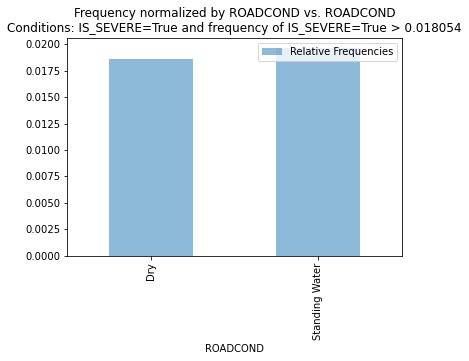

In [143]:
ax = df_frequencies_by_roadcond[\
    df_frequencies_by_roadcond.xs(True, level=1, axis=0) > severity_frequency_cutoff]\
    .dropna().xs(True, level=1, axis=0).plot.bar(alpha=.5,\
    title='Frequency normalized by ROADCOND vs. ROADCOND\nConditions: IS_SEVERE=True and frequency of IS_SEVERE=True > %f' %\
    (severity_frequency_cutoff))

### Relationship between Severity and Light Conditions
Similar to road conditions, the light conditions for each accident are partially controlled by the weather and partially controlled by transit infrastructure.
The presence of street lights and their ablility to turn on when it is sufficiently dark outside affect the severity of accidents in a non-trivial manner.
An interesting property of the data is that the likelihood of a severe accident is LESS when it is DARK and there are NO street lights, compared to any of the following other cases:
<ul>
    <li>it is DARK and the street lights are OFF;</li>
    <li>it is DARK and the street lights are ON;</li>
    <li>it is DAWN;</li>
    <li>it is DUSK.</li>
 </ul>
The underlying mechanism for this counter-intuitive result may be a rather complicated confluence of factors, e.g. roadways with no street lights might have less traffic.
In any case, the models we build based on this data won't need to know the underlying mechanism in order to predict accident severity.
However, the reason for this seeming paradox would certainly be of interest to traffic engineers and city planners.

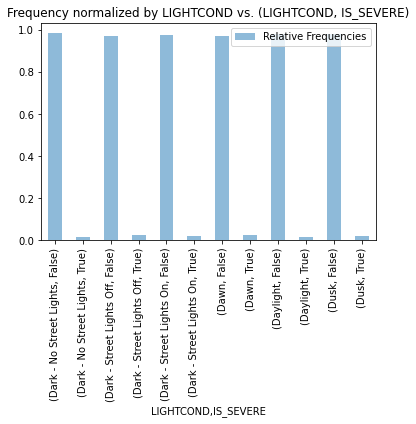

In [144]:
ax = df_frequencies_by_lightcond.plot.bar(alpha=.5, title='Frequency normalized by LIGHTCOND vs. (LIGHTCOND, IS_SEVERE)')

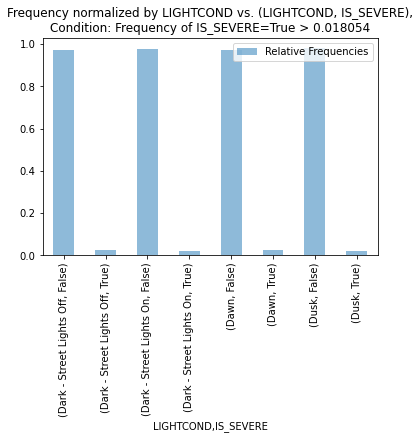

In [145]:
ax = df_frequencies_by_lightcond[df_frequencies_by_lightcond.xs(True, level=1, axis=0) > severity_frequency_cutoff].dropna().plot.bar(\
    alpha=.5, title='Frequency normalized by LIGHTCOND vs. (LIGHTCOND, IS_SEVERE),\nCondition: Frequency of IS_SEVERE=True > %f' %\
    (severity_frequency_cutoff))

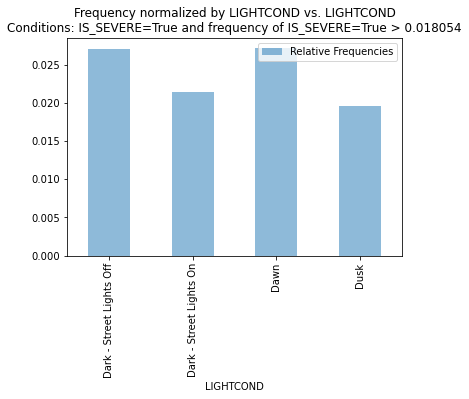

In [146]:
ax = df_frequencies_by_lightcond[df_frequencies_by_lightcond.xs(True, level=1, axis=0) > severity_frequency_cutoff].dropna().xs(True,\
    level=1, axis=0).plot.bar(alpha=.5,\
    title='Frequency normalized by LIGHTCOND vs. LIGHTCOND\nConditions: IS_SEVERE=True and frequency of IS_SEVERE=True > %f' %\
    (severity_frequency_cutoff))

## IV. Results

### Applying the Standard Algorithms and Associated Issues
Before we can train and test any model, we must create training and testing data sets.
But only $1.8$% of the accidents in the original data set are of major severity.
This imbalance poses challenges for machine learning methods.
We overcome this issue by sampling the set of major accidents with replacement.
Next, we combine this "oversampling" of major accidents with an equal number of minor accidents.
The resulting set is the balanced set we use as the training data.
The test data are comprised of all of data not selected for training.
Consequently, the training and testing sets are mutually exclusive;
the models will only be tested on "new" data, accidents they have never "seen" in training.

After a balanced training set is created, the logistic regression, support vector machine and decision tree classifiers are almost ready for training.
However, there are a several hyperparameters that must be set for each of these three classifiers.
Their default values may not be adequate because of size of the training data set, the sparse representation of the features, or some other properties of the data.
Hyperparameters for the $k$-nearest neighbors classifier must also be set based on properties of the training data.
The $k$-nearest neighbors classifier has an additional caveat in that the number of neighbors must be tuned to the "best" value based before training can occur.
In finding the optimum number of neighbors, it is important to avoid over- and under-fitting based on the training data available.
Lastly, it is essential to consider the limited computational resources that are available in the search for the best number of neighbors.

### Resolving the Issues
For the logistic regression, support vector machine and decision tree classifiers, we primarily use the default values for their hyperparameters.
Since both the number of samples and the number of features is large, we choose the "saga" solver for the logistic regression.
For the support vector machine, we select the algorithm to solve the primal problem instead of the dual problem.
The reason for this choice is that the number of samples is larger than the number of features (.

Of the four supervised learning models used in this project,
the $k$-nearest neighbors model requires the most computational resources, just to find the optimum number of neighbors $k$.
If the value of $k$ is even, then a tie among the even number of neighbors is certainly possible.
However, the output of the algorithm, in the event of a tie, is dependent on the order in which the neighbors are processed.
To avoid this unwanted behavior, we allow only odd values for $k$.
Through trial and error, and using a large amount of computing time early on, we "discovered" that for every training set we used,
the corresponding optimum value of $k$ was less than $200$.
Based on these annecdotes, and given training data, we use a grid search to find the best value for $k$, 
the only restrictions being $k$ is odd and $1 < k < 200$.

## Model Perfomance
In assessing our models, we use the convention that a positive prediction corresponds to an accident classified to have major severity,
and a negative prediction represents an accident with minor severity.
There are numerous metrics available to gauge the performance of these models, including accuracy, $F_{1}$, precision, and recall.
While the $F_{1}$ score strikes a balance between the precision and the recall, 
we reiterate that the purpose of these models is to predict the severity of an accident.
In this situation, it is reasonable to place more emphasis on avoiding Type-II errors (false negatives).
If an accident has minor severity (true condition) and a model incorrectly classifies it as having major severity (predicted condition),
this may cause mild inconvenience for someone delaying travel based on current weather, road, and light conditions.
On the other hand, the cost of a Type-II error (false negative) is much greater,
potentially giving clients of the model a false sense of safety regarding a particular commute.
For these reasons, we use the recall score to compare our models.

In the table below, we present the average over the folds of the cross-validation for the performance metrics of each model that implements them:
<ul>
    <li>recall score (weighted)</li>
    <li>precision (weighted)</li>
    <li>F-1 (weighted)</li>
    <li>negative log loss (weighted)</li>
</ul>
The models are arranged in descending order by weighted recall score.
The use of weighted scores is essential because the test data set is imbalanced with respect to accident severity.
We note that a negative log loss value closer to 0 corresponds to a better model..

To compare the models more easily,
we also display three forms of confusion matrices from the first fold of that model's cross-validation: 
not normalized, normalized over the true conditions, and normalized over the predicted conditions.

In [147]:
# Display the DataFrame of model scores sorted in descending order by weighted recall.
df_scores[display_columns]

,Recall (weighted),Precision (weighted),F-1 (weighted),Negative Log Loss
Decision Tree,0.745824675,0.748339896,0.745178153,-0.701376799
Logistic Regression,0.744781465,0.748140766,0.743900241,-0.527380009
Support Vector Machine,0.741419483,0.748514099,0.739564366,NaN
k-Nearest Neighbors,0.740258785,0.743952668,0.739266400,-0.534504275


Logistic Regression, Fold 1 of 5:

              precision    recall  f1-score   support

       Major   0.059993  0.681481  0.110279       540
       Minor   0.992753  0.803389  0.888089     29327

    accuracy                       0.801185     29867
   macro avg   0.526373  0.742435  0.499184     29867
weighted avg   0.975888  0.801185  0.874026     29867



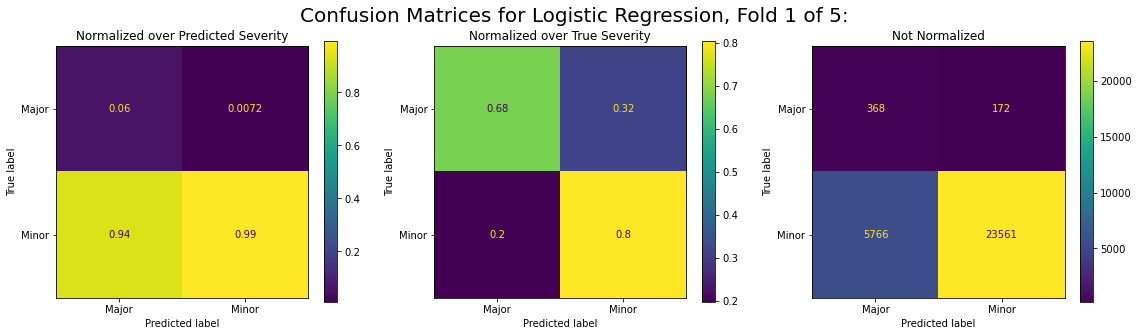

In [148]:
# For each logistic regression classifier in the cross-validation, print the macro recall, score report, and confusion matrices.
number_of_models = len(logistic_regression_scores['estimator'])
#labels = ['1', '2', '2b', '3']
labels = [True, False]
target_names = ['Major', 'Minor']
display_labels = target_names
for index, logistic_regression_clf in zip(range(number_of_models), logistic_regression_scores['estimator']):
    y_test_predicted = logistic_regression_clf.predict(X_test)
    print('Logistic Regression, Fold %d of %d:' % (index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=target_names, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for Logistic Regression, Fold %d of %d:' % (index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1, 3, 1)
    ax.set_title("Normalized over Predicted Severity", fontsize=12)
    plot_confusion_matrix(logistic_regression_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Normalized over True Severity", fontsize=12)
    plot_confusion_matrix(logistic_regression_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(logistic_regression_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize=None, ax=ax)

    plt.show()
    break # exit the for loop and do not repeat it.

Support Vector Machine, Fold 1 of 5:

              precision    recall  f1-score   support

       Major   0.067414  0.657407  0.122287       540
       Minor   0.992480  0.832543  0.905504     29327

    accuracy                       0.829377     29867
   macro avg   0.529947  0.744975  0.513895     29867
weighted avg   0.975755  0.829377  0.891343     29867



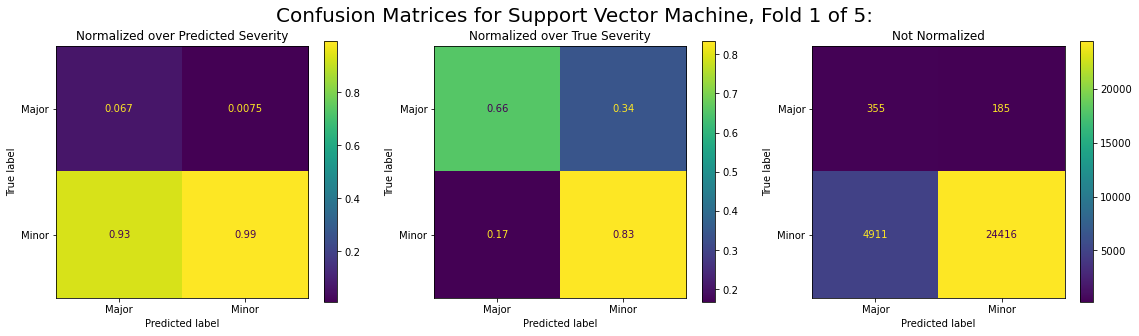

In [149]:
# For each support vector machine classifier in the cross-validation, print the score report and confusion matrices.
number_of_models = len(linear_svc_scores['estimator'])
#labels = ['1', '2', '2b', '3']
labels = [True, False]
target_names = ['Major', 'Minor']
display_labels = target_names
for index, linear_svc_clf in zip(range(number_of_models), linear_svc_scores['estimator']):
    y_test_predicted = linear_svc_clf.predict(X_test)
    print('Support Vector Machine, Fold %d of %d:' % (index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=target_names, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for Support Vector Machine, Fold %d of %d:' % (index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1,3,1)
    ax.set_title("Normalized over Predicted Severity", fontsize=12)
    plot_confusion_matrix(linear_svc_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1,3,2)
    ax.set_title("Normalized over True Severity", fontsize=12)
    plot_confusion_matrix(linear_svc_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1,3,3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(linear_svc_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize=None, ax=ax)
    
    plt.show()
    break # exit the for loop and do not repeat it.

k-Nearest Neighbors (k = 183), Fold 1 of 5:

              precision    recall  f1-score   support

       Major   0.060850  0.657407  0.111390       540
       Minor   0.992302  0.813176  0.893853     29327

    accuracy                       0.810359     29867
   macro avg   0.526576  0.735291  0.502622     29867
weighted avg   0.975461  0.810359  0.879706     29867



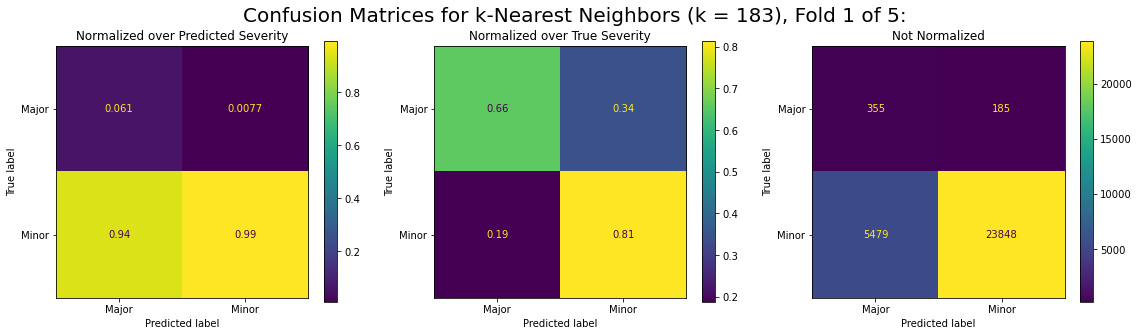

In [150]:
# For each k-Nearest Neighbor classifier in the cross-validation, print the macro recall, score report, and confusion matrices.
number_of_models = len(k_neighbors_scores['estimator'])
#labels = ['1', '2', '2b', '3']
labels = [True, False]
target_names = ['Major', 'Minor']
display_labels = target_names
for index, knn_clf in zip(range(number_of_models), k_neighbors_scores['estimator']):
    n_neighbors = knn_clf.get_params()['kneighborsclassifier__n_neighbors']
    y_test_predicted = knn_clf.predict(X_test)
    print('k-Nearest Neighbors (k = %d), Fold %d of %d:' % (n_neighbors, index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=target_names, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for k-Nearest Neighbors (k = %d), Fold %d of %d:' %\
                 (n_neighbors, index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1, 3, 1)
    ax.set_title("Normalized over Predicted Severity", fontsize=12)
    plot_confusion_matrix(knn_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Normalized over True Severity", fontsize=12)
    plot_confusion_matrix(knn_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(knn_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize=None, ax=ax)

    plt.show()
    break # exit the for loop and do not repeat it.

Decision Tree, Fold 1 of 5:

              precision    recall  f1-score   support

       Major   0.056397  0.668519  0.104020       540
       Minor   0.992372  0.794046  0.882200     29327

    accuracy                       0.791777     29867
   macro avg   0.524385  0.731282  0.493110     29867
weighted avg   0.975449  0.791777  0.868131     29867



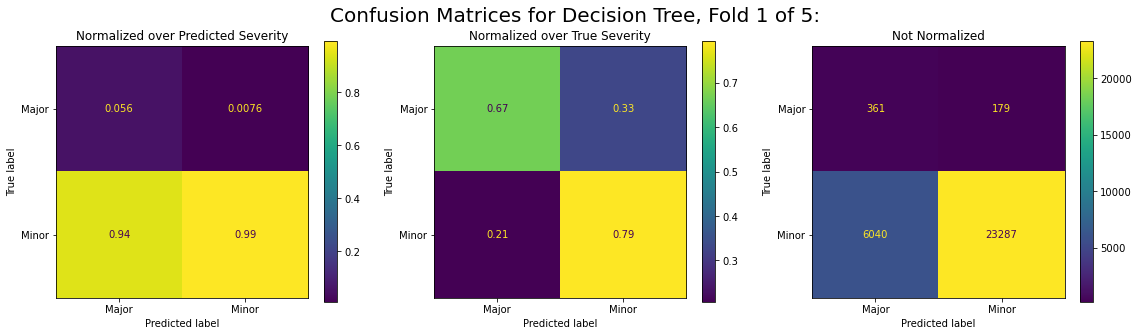

In [151]:
# For each decision tree classifier in the cross-validation, print the score report and confusion matrices.
number_of_models = len(decision_tree_scores['estimator'])
#labels = ['1', '2', '2b', '3']
labels = [True, False]
target_names = ['Major', 'Minor']
display_labels = target_names

for index, decision_tree_clf in zip(range(number_of_models), decision_tree_scores['estimator']):
    y_test_predicted = decision_tree_clf.predict(X_test)
    print('Decision Tree, Fold %d of %d:' % (index + 1, number_of_models))
    print()
    print(classification_report(y_test, y_test_predicted, labels=labels, target_names=target_names, digits=6))
        
    # Create a figure.
    fig = plt.figure(num=str(index + 1), figsize=(6.4 * 3, 4.8))
    fig.suptitle('Confusion Matrices for Decision Tree, Fold %d of %d:' % (index + 1, number_of_models), fontsize=20)
    
    ax = plt.subplot(1,3,1)
    ax.set_title("Normalized over Predicted Severity", fontsize=12)
    plot_confusion_matrix(decision_tree_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='pred', ax=ax)
    
    ax = plt.subplot(1,3,2)
    ax.set_title("Normalized over True Severity", fontsize=12)
    plot_confusion_matrix(decision_tree_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize='true', ax=ax)
    
    ax = plt.subplot(1,3,3)
    ax.set_title("Not Normalized", fontsize=12)
    plot_confusion_matrix(decision_tree_clf, X_test, y_test, labels=labels, display_labels=display_labels, normalize=None, ax=ax)
    
    plt.show()
    break # exit the for loop and do not repeat it.

## V. Discussion

### Model Comparisons

Logistic Regression Cross-Validation Scores:\
test_f1_weighted: mean = 0.743900, std = 0.010909     SECOND\
test_neg_log_loss: mean = -0.527380, std = 0.009088 FIRST\
test_precision_weighted: mean = 0.748141, std = 0.010029     THIRD\
test_recall_weighted: mean = 0.744781, std = 0.010642     SECOND\

Support Vector Machine Cross-Validation Scores:\
test_f1_weighted: mean = 0.739564, std = 0.010119     THIRD\
test_precision_weighted: mean = 0.748514, std = 0.010502     FIRST\
test_recall_weighted: mean = 0.741419, std = 0.010043     THIRD\

k-Nearest Neighbors (k = 183) Cross-Validation Scores:\
test_f1_weighted: mean = 0.739266, std = 0.014733     FOURTH\
test_neg_log_loss: mean = -0.534504, std = 0.011204 SECOND\
test_precision_weighted: mean = 0.743953, std = 0.014436     FOURTH\
test_recall_weighted: mean = 0.740259, std = 0.014522     FOURTH\

Decision Tree Cross-Validation Scores:\
test_f1_weighted: mean = 0.745178, std = 0.009353     FIRST\
test_neg_log_loss: mean = -0.701377, std = 0.034892 THIRD\
test_precision_weighted: mean = 0.748340, std = 0.009260     SECOND\
test_recall_weighted: mean = 0.745825, std = 0.009291     FIRST\

## VI. Conclusion

### Future Investigations
All of the models in this project were designed to solve a binary classification problem: classify the severity of a given motor vehicle accident as either minor or major.
An extension of this problem is to predict the number of non-serious injuries, the number of serious injuries, and the number of fatalities for a given accident.
The data set for the current project included the number of victims in each category.
These categories must be added as features for future models to make injury and fatality predictions.
This new problem is a multlabel problem because it also requires the model to predict the number of people in each of the injury/fatality categories.
At the same time, because the number of individuals in each categroy is integer-valued, it is also a regression problem.
Therefore, the problem requires the construction of three regresssion models, one for each category of victim, 
along with the a model for the original classification problem addressed by this paper.

An additional problem brought to light by the Seattle Collisions Dataset is the question of how accident severity depends on location and time data.
Since the dataset contains attributes representing the longitude and latitude for each incident, as well as the date and time,
it is reasonable to incorporate this data into future model development.
Theses data will perhaps reveal certain hours of the day or parts of the year that are more dangerous compared to other times.
Traffic engineers would likely be interested in identifying specific locations/times, e.g. certain intersections, showing increased likelihoodof fatal or serious accidents, so they can mitigate risk by modifying traffic patterns or infrastructure.

## Acknowledgements
In completing this Data Science Capstone Project, I am eternally grateful to my wife, Linda Garica, for her invaluable advice and infinite patience.
I am also indebted to Captain Mike Jennings, Oceanside Fire Department (Retired), Oceanside, CA. 
Mike was gratious enough to share his experiences as a first responder, 
as well as his professional insight regarding motor vehicle accidents and his enthusiasm about increasing safety on the roads.